# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]#此代码的意思是取到data数据的所有行和从第二列的所有列
labels = data[::,0]#此代码的意思是取到data数据的第一列

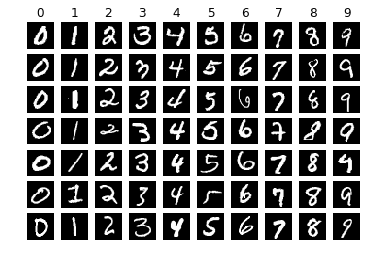

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
#下面是没见过的函数的介绍帮助理解
#numpy.random.choice(a, size=None, replace=True, p=None)
#a : 如果是一维数组，就表示从这个一维数组中随机采样；如果是int型，就表示从0到a-1这个序列中随机采样。 
#size : 采样结果的数量，默认为1.可以是整数，表示要采样的数量；也可以为tuple，如(m, n, k)，则要采样的数量为m * n * k，size为(m, n, k)。 
#replace : boolean型，采样的样本是否要更换？这个地方我不太理解，测了一下发现replace指定为True时，采样的元素会有重复；当replace指定为False时，采样不会重复。 
#p : 一个一维数组，制定了a中每个元素采样的概率，若为默认的None，则a中每个元素被采样的概率相同。
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)#这是输出所有y==labels中的数据的索引（位置）
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))#绘制二维图，记住只能是28,28因为这是数据集的设置问题，其实imgs对应的每一行都是一个数字
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels to binary
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [5]:
X_train_feats = (X_train-np.mean(X_train))/np.std(X_train) # choose and extract features
X_test_feats = (X_test-np.mean(X_test))/np.std(X_test) # choose and extract features

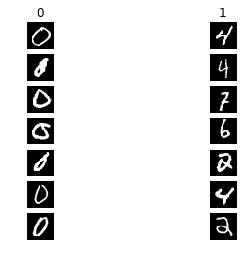

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.690004
iteration 20 / 500: loss 0.381840
iteration 40 / 500: loss 0.347297
iteration 60 / 500: loss 0.245958
iteration 80 / 500: loss 0.270786
iteration 100 / 500: loss 0.198488
iteration 120 / 500: loss 0.116262
iteration 140 / 500: loss 0.185801
iteration 160 / 500: loss 0.215011
iteration 180 / 500: loss 0.209554
iteration 200 / 500: loss 0.139149
iteration 220 / 500: loss 0.168083
iteration 240 / 500: loss 0.220496
iteration 260 / 500: loss 0.126041
iteration 280 / 500: loss 0.119205
iteration 300 / 500: loss 0.096545
iteration 320 / 500: loss 0.098876
iteration 340 / 500: loss 0.125214
iteration 360 / 500: loss 0.113742
iteration 380 / 500: loss 0.064422
iteration 400 / 500: loss 0.057985
iteration 420 / 500: loss 0.101358
iteration 440 / 500: loss 0.117230
iteration 460 / 500: loss 0.064175
iteration 480 / 500: loss 0.075732
500


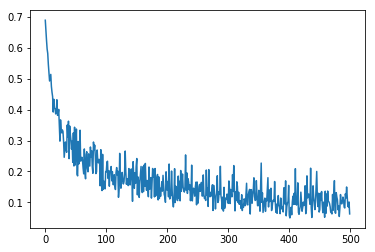

In [8]:
plt.plot(loss_history)

In [9]:
y_test_pred = classifier.predict(X_test_feats)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

The accuracy socre is  0.9758571428571429


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [10]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
TP,FP,FN,TN= 0,0,0,0
for i in range(len(y_test)):
    if y_test[i] == 0 and y_test_pred[i] == 0:
        TP+=1
    elif y_test[i] == 1 and y_test_pred[i] == 1:
        TN+=1
    elif y_test[i] == 0 and y_test_pred[i] == 1:
        FN+=1
    else:
        FP+=1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

0.9628990509059534
0.7909284195605953
F1: 0.8684824902723736


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [12]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [13]:
X_train_feats = (X_train-np.mean(X_train))/np.std(X_train)
X_test_feats = (X_test-np.mean(X_test))/np.std(X_test)

In [20]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.

classifier = LogisticRegression()
classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-3,
    num_iters = 500,
    batch_size = 64,
)

当前预测是数字是: 0
iteration 0 / 500: loss 0.698566
iteration 20 / 500: loss 0.402859
iteration 40 / 500: loss 0.296793
iteration 60 / 500: loss 0.303695
iteration 80 / 500: loss 0.181000
iteration 100 / 500: loss 0.219426
iteration 120 / 500: loss 0.218875
iteration 140 / 500: loss 0.166887
iteration 160 / 500: loss 0.144130
iteration 180 / 500: loss 0.222776
iteration 200 / 500: loss 0.139632
iteration 220 / 500: loss 0.131754
iteration 240 / 500: loss 0.144949
iteration 260 / 500: loss 0.167198
iteration 280 / 500: loss 0.118202
iteration 300 / 500: loss 0.170958
iteration 320 / 500: loss 0.076713
iteration 340 / 500: loss 0.132861
iteration 360 / 500: loss 0.095730
iteration 380 / 500: loss 0.090311
iteration 400 / 500: loss 0.101154
iteration 420 / 500: loss 0.111109
iteration 440 / 500: loss 0.068254
iteration 460 / 500: loss 0.087344
iteration 480 / 500: loss 0.094722
500
当前预测是数字是: 1
iteration 0 / 500: loss 0.694426
iteration 20 / 500: loss 0.417741
iteration 40 / 500: loss 0.346597
it

iteration 180 / 500: loss 0.207677
iteration 200 / 500: loss 0.252648
iteration 220 / 500: loss 0.285775
iteration 240 / 500: loss 0.316712
iteration 260 / 500: loss 0.309490
iteration 280 / 500: loss 0.288168
iteration 300 / 500: loss 0.285571
iteration 320 / 500: loss 0.270149
iteration 340 / 500: loss 0.289119
iteration 360 / 500: loss 0.292315
iteration 380 / 500: loss 0.263224
iteration 400 / 500: loss 0.264783
iteration 420 / 500: loss 0.294134
iteration 440 / 500: loss 0.206865
iteration 460 / 500: loss 0.218821
iteration 480 / 500: loss 0.316405
500
[[0.00662102 0.00497611 0.0082754  ... 0.00794439 0.0108362  0.0072288 ]
 [0.00964543 0.00503474 0.00875838 ... 0.00673373 0.01016298 0.00875433]
 [0.00763002 0.00626992 0.00654443 ... 0.00776992 0.0106505  0.00756873]
 ...
 [0.00797279 0.00566741 0.00955964 ... 0.00623494 0.01147765 0.01004781]
 [0.00726248 0.00559482 0.0075326  ... 0.00676668 0.0111395  0.00575999]
 [0.00901962 0.0049669  0.00756679 ... 0.00716287 0.00950982 0.007

In [24]:
# you may change your code in function `predict`
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print("The accruacy socre is ", np.mean(y_test == y_test_pred))

The accruacy socre is  0.8317142857142857
